<a href="https://colab.research.google.com/github/jminango20/DataCleaning/blob/master/scaling_and_normalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Scaling and Normalization

In this notebook, we're going to be looking at how to scale and normalize data (and what the difference is between the two!).

Let's get started!

## Get our environment set up

The first thing we'll need to do is load in the libraries we'll be using.

In [2]:
#Libraries
import pandas as pd
import numpy as np

#for Box-Cox Transformation (Normalization)
from scipy import stats

#for mix-max scaling
from mlxtend.preprocessing import minmax_scaling

#plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

#set seed for reproducibility
np.random.seed(0) 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Scaling vs. Normalization: What's the difference?

One of the reasons that it's easy to get confused between scaling and normalization is because the terms are sometimes used interchangeably and, to make it even more confusing, they are very similar! In both cases, you're transforming the values of numeric variables so that the transformed data points have specific helpful properties. The difference is that:

* **in scaling, you're changing the range of your data,**
* **in normalization, you're changing the shape of the distribution of your data.**

Let's talk a little more in-depth about each of these options.

## Scaling

This means that you're transforming your data so that it fits within a specific scale, like 0-100 or 0-1. You want to scale data when you're using methods based on measures of how far apart data points are.

By scaling your variables, you can help compare different variables on equal footing. To help solidify what scaling looks like, let's look at a made-up example.

In [5]:
# generate 1000 data points randomly drawn from an exponential distribution
original_data = np.random.exponential(size=1000)

In [8]:
# mix-max scale the data between 0 and 1
scaled_data = minmax_scaling(original_data,columns=[0])

Text(0.5, 1.0, 'Scaled Data')

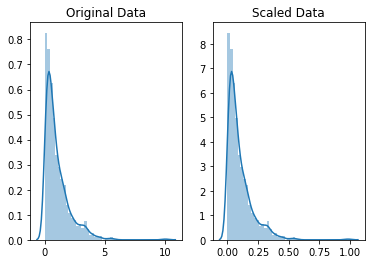

In [14]:
# plot both together to compare
fig, ax = plt.subplots(1,2)
sns.distplot(original_data,ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(scaled_data,ax=ax[1])
ax[1].set_title("Scaled Data")


Notice that the shape of the data doesn't change, but that instead of ranging from 0 to 8ish, it now ranges from 0 to 1.

## Normalization
Scaling just changes the range of your data. Normalization is a more radical transformation. The point of normalization is to change your observations so that they can be described as a normal distribution.

**Normal distribution**: Also known as the "bell curve", this is a specific statistical distribution where a roughly equal observations fall above and below the mean, the mean and the median are the same, and there are more observations closer to the mean. The normal distribution is also known as the Gaussian distribution.

The method we're using to normalize here is called the Box-Cox Transformation. Let's take a quick peek at what normalizing some data looks like:

In [22]:
# normalize the exponential data with boxcox
normalized_data = stats.boxcox(original_data)

(array([ 5.47581176e-01, -4.12555855e-01, -2.88958463e-01, -1.06315061e+00,
        -7.29715228e-02, -8.95903244e-01, -1.46736679e-01, -1.36376774e+00,
        -1.40735613e+00, -5.70141518e-01, -5.43696334e-01, -1.00521077e+00,
        -1.53605089e+00, -2.18376758e+00, -2.36757132e+00, -9.94104246e-01,
        -4.50167887e-01,  2.67785087e-01, -4.15753523e-01,  9.53087246e-01,
        -2.23063488e+00, -1.31862775e+00, -7.89849369e-01, -1.46175885e-01,
         7.07898888e-01, -7.56071569e-01, -1.00560127e+00, -1.96746220e+00,
         5.83633735e-01, -6.72755029e-01, -1.61877362e-01,  1.70596653e+00,
        -3.13313587e+00, -1.47013361e+00,  4.34972407e-01,  5.24594559e-01,
         4.02432920e-01, -2.52684992e-01,  1.61568566e+00, -6.27027015e-01,
        -8.12525828e-02, -1.95545027e+00, -5.89620660e-01,  2.56531436e-01,
        -1.10315901e+00,  1.21654148e+00,  1.52079440e-01, -9.43272862e-01,
         4.01623210e-01, -1.81082668e+00,  1.54962027e+00, -2.07898904e+00,
         1.1

Text(0.5, 1.0, 'Normalized Data')

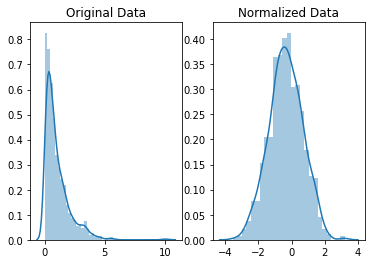

In [23]:
# plot both together to compare
fig, ax = plt.subplots(1,2)
sns.distplot(original_data,ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(normalized_data[0],ax=ax[1])
ax[1].set_title("Normalized Data")


Notice that the shape of our data has changed. Before normalizing it was almost L-shaped. But after normalizing it looks more like the outline of a bell (hence "bell curve").